# Functionality of Helper Test

## Evironmental Preparation

In [1]:
import importlib
import tensorflow as tf
from keras.datasets import fashion_mnist

import source.utils.image_classifier_visualizer as icv

c:\MEIN_PLATZ\Git\pcb-defect-detection\venv\Lib\site-packages\tensorflow\python\framework\dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255
train_data = tf.expand_dims(train_data, -1)  
test_data = tf.expand_dims(test_data, -1)

train_labels = tf.keras.utils.to_categorical(train_labels, len(class_names))
test_labels = tf.keras.utils.to_categorical(test_labels, len(class_names))

batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(batch_size)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(train_dataset, epochs=1)

1875/1875 [==============================] - 19s 8ms/step - loss: 0.4936 - accuracy: 0.8219


In [13]:
predictions = model.predict(test_dataset)

 13/313 [>.............................] - ETA: 1s

313/313 [==============================] - 1s 4ms/step


(10000, 10)

## Setup

In [7]:
def get_visualizer():
    importlib.reload(icv)
    visualizer = icv.ImageClassifierVisualizer(class_names)
    return visualizer

visualizer = get_visualizer()

## Test 1: Plot Images

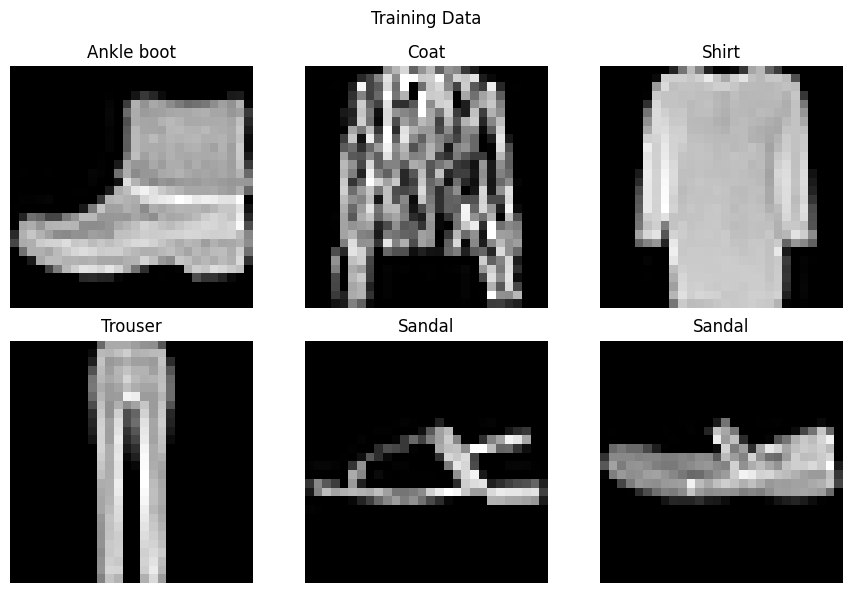

<module 'matplotlib.pyplot' from 'c:\\MEIN_PLATZ\\Git\\pcb-defect-detection\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
visualizer = get_visualizer()
visualizer.plot_images(train_dataset, n_rows=2, n_cols=3, title="Training Data")

## Test 2: Plot Class Specific Images

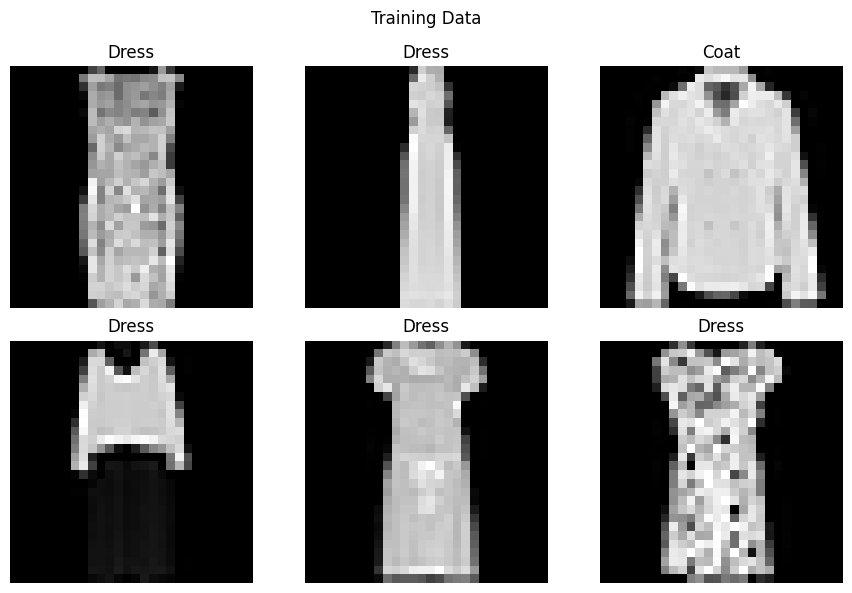

In [9]:
visualizer = get_visualizer()
visualizer.plot_class_specific_images(train_dataset, classes=['Dress', 'Coat'], n_rows=2, n_cols=3, title="Training Data")

## Test 3: Plot Image Comparisons

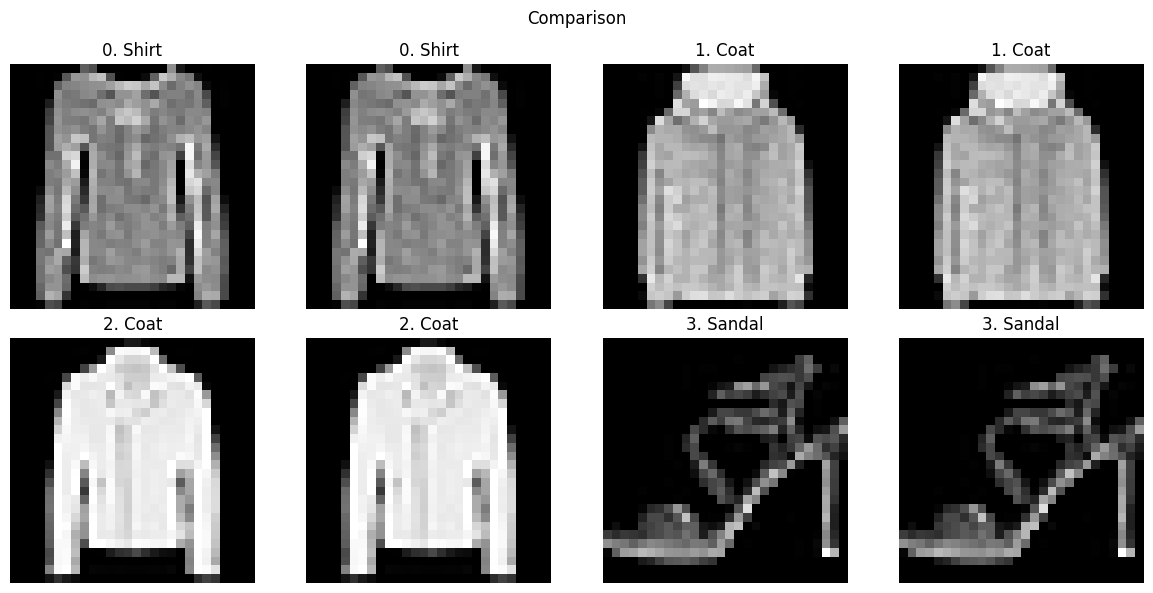

<module 'matplotlib.pyplot' from 'c:\\MEIN_PLATZ\\Git\\pcb-defect-detection\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
visualizer = get_visualizer()
visualizer.plot_image_comparisons(train_dataset, train_dataset, n_rows=2, n_cols=2, title="Comparison")

## Test 4: Plot Image Comparisons with Class Specific Images

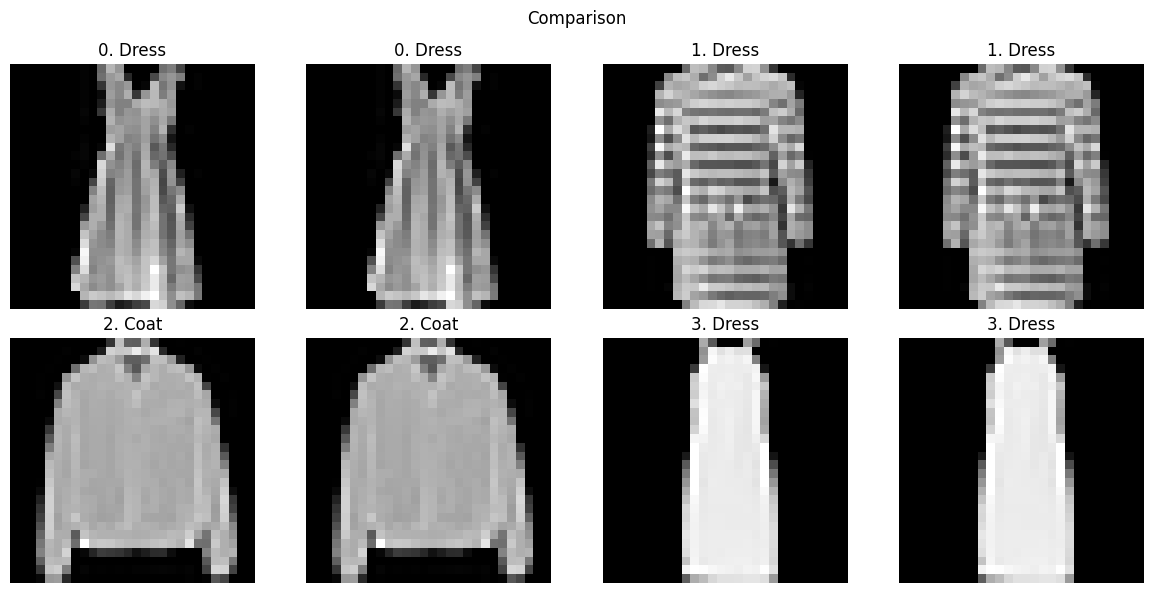

<module 'matplotlib.pyplot' from 'c:\\MEIN_PLATZ\\Git\\pcb-defect-detection\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
visualizer = get_visualizer()
visualizer.plot_class_specific_image_comparisons(train_dataset, train_dataset, classes=['Dress', 'Coat'], n_rows=2, n_cols=2, title="Comparison")

## Test 5: Plot Results

  1/313 [..............................] - ETA: 2s

313/313 [==============================] - 1s 2ms/step


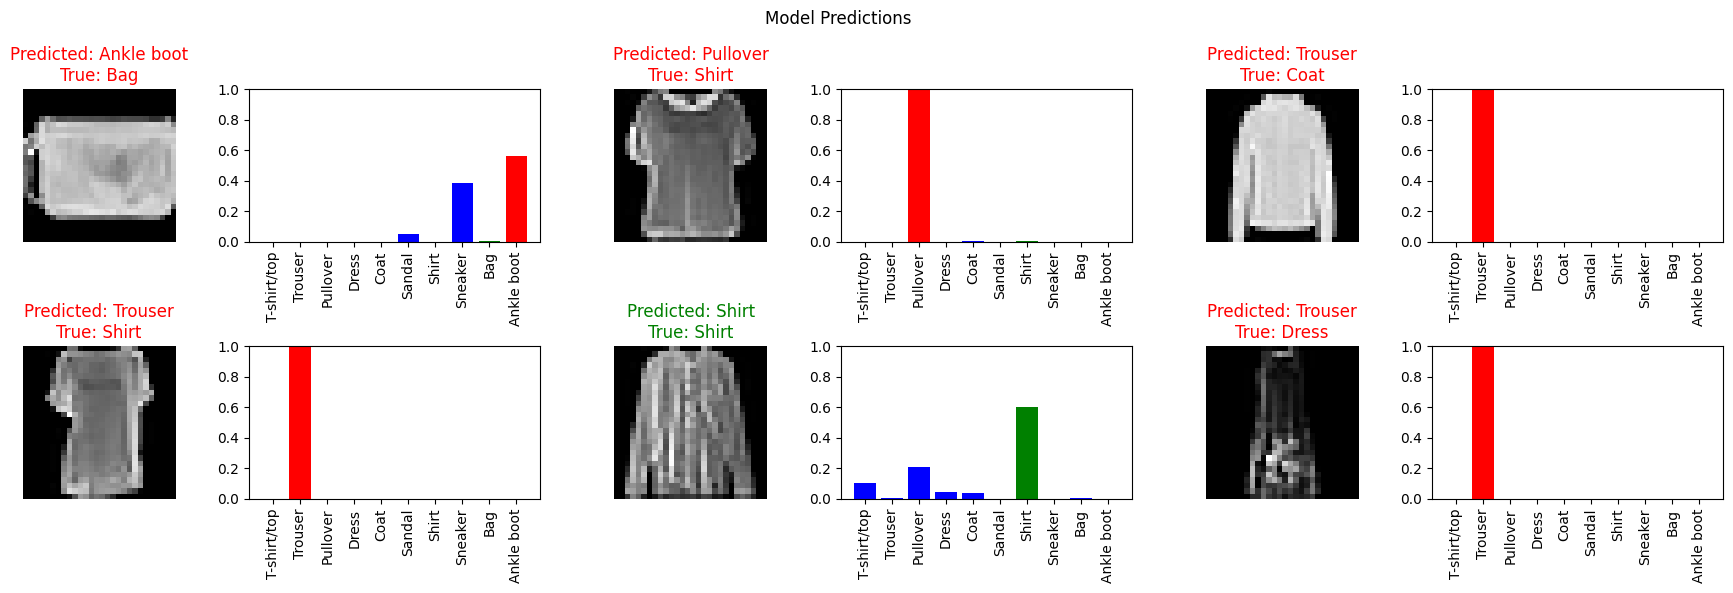

In [20]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
visualizer.plot_results(n_rows=2, n_cols=3, title="Model Predictions")

## Test 6: Plot Results with Class Specific Images

  1/313 [..............................] - ETA: 4s

313/313 [==============================] - 1s 2ms/step


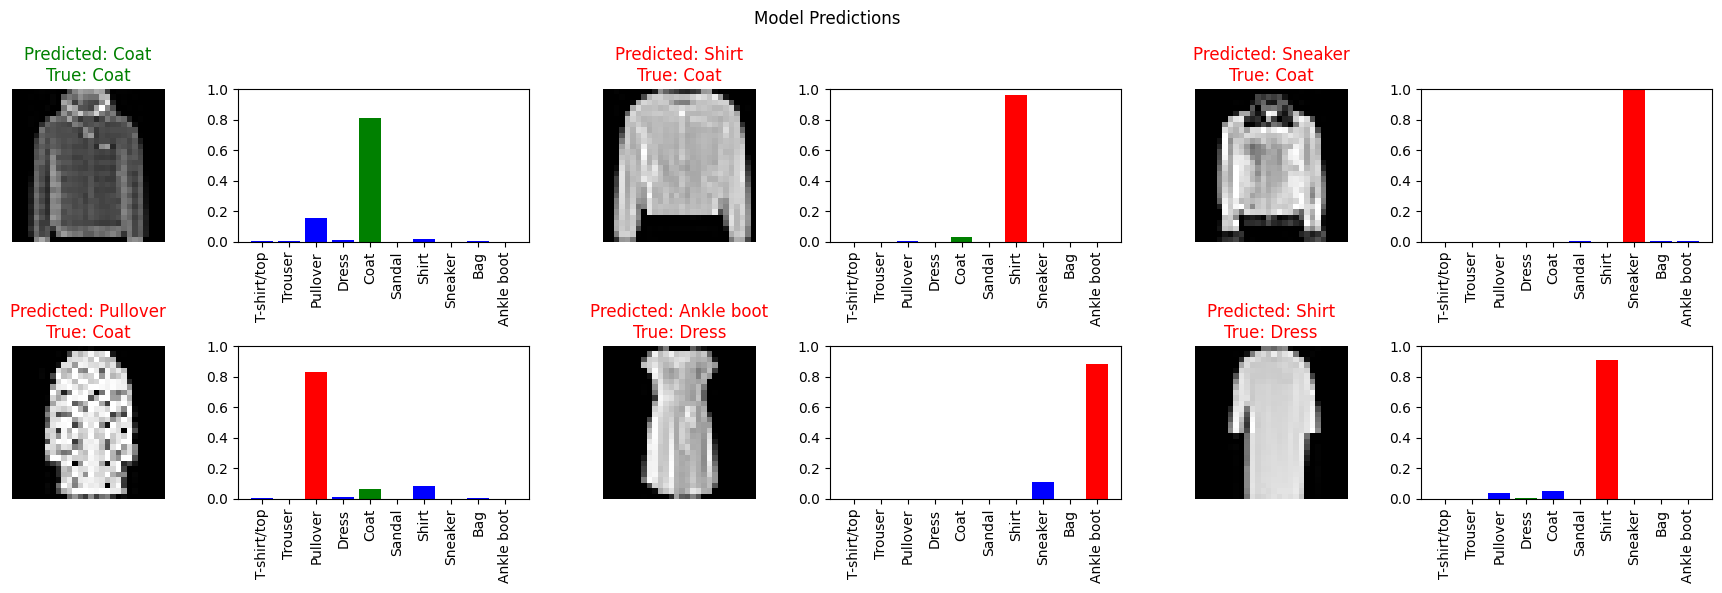

In [24]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
visualizer.plot_class_specific_results(classes=['Dress', 'Coat'], n_rows=2, n_cols=3, title="Model Predictions")

## Test 7: Plot False Results

313/313 [==============================] - 1s 2ms/step


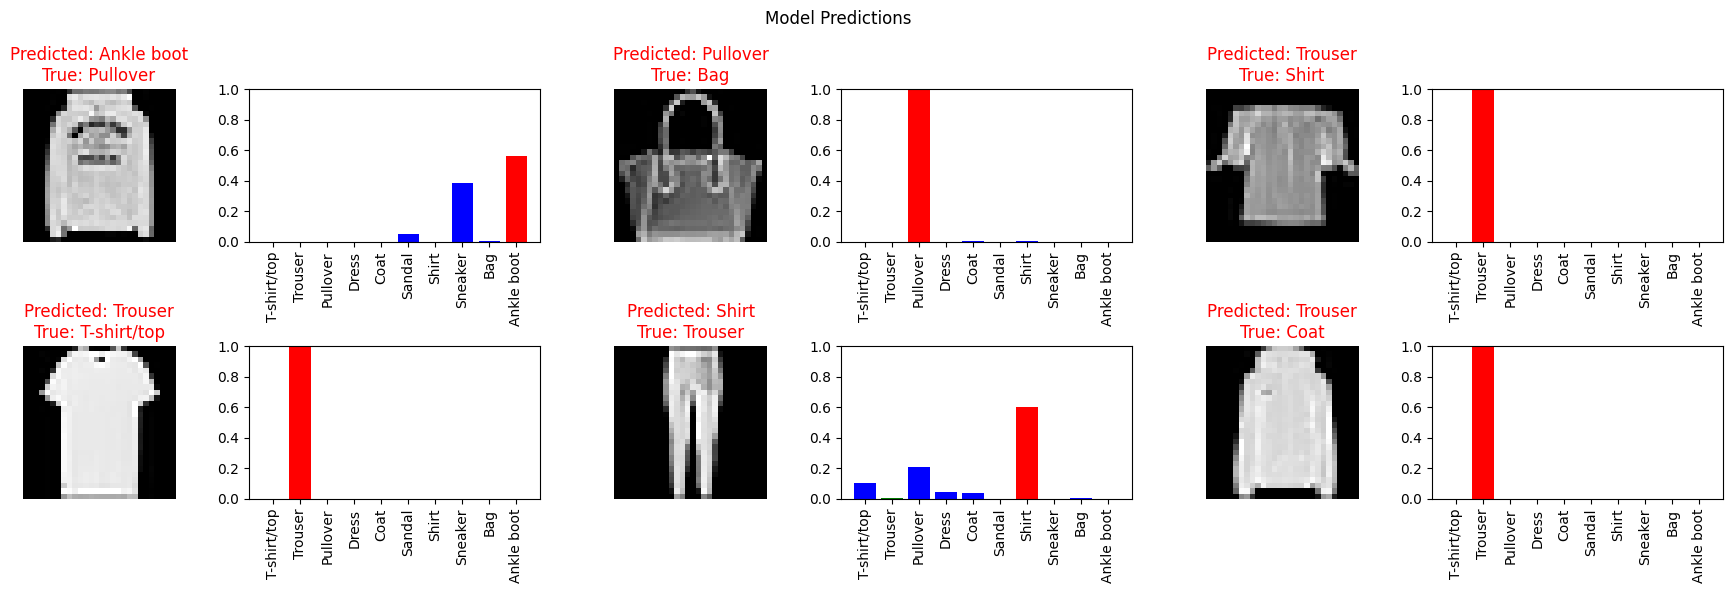

In [25]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
visualizer.plot_false_results(n_rows=2, n_cols=3, title="Model Predictions")

## Test 8: Plot Confusion Matrix

313/313 [==============================] - 3s 7ms/step


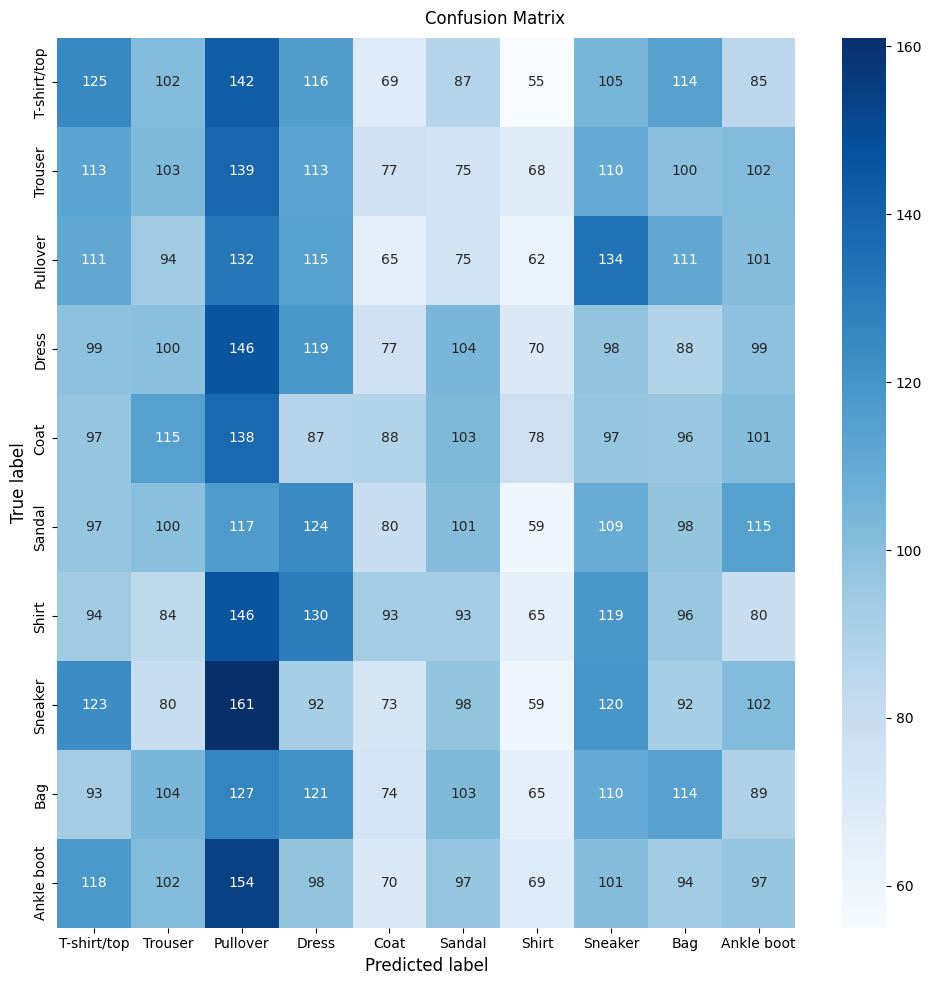

In [8]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
visualizer.plot_confusion_matrix(title="Confusion Matrix")